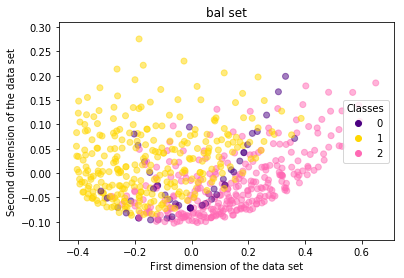

(2, 4) (625, 2)
[[ 0.03833874  0.02213487  0.02553301  0.04546294]
 [ 0.06541032  0.03776466 -0.00257059  0.05966558]
 [ 0.05554946  0.03207149 -0.03347403  0.03852993]
 ..., 
 [-0.00143284 -0.00082725  0.02568057  0.00863516]
 [ 0.02142648  0.01237058  0.02706466  0.03037242]
 [ 0.03833874  0.02213487  0.02553301  0.04546294]]


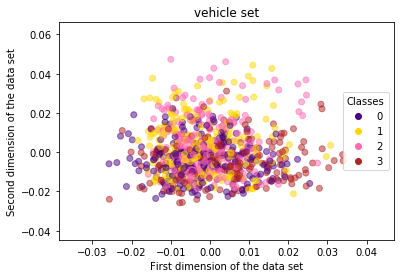

(2, 18) (846, 2)
[[ -1.19059795e-03   2.42182181e-04   1.16597524e-03 ...,   7.16506077e-04
   -6.21431086e-04   8.11905973e-05]
 [  2.44572720e-04  -3.21655665e-04  -4.98580407e-04 ...,   2.14471936e-03
    3.28206883e-04   2.01515238e-04]
 [ -4.23397608e-04   5.60743788e-04   8.66846777e-04 ...,  -3.74577200e-03
   -5.71061032e-04  -3.51989094e-04]
 ..., 
 [  1.29181982e-03   1.05424508e-03  -1.02833671e-05 ...,  -1.18785752e-02
   -2.97139797e-04  -1.14494313e-03]
 [ -4.44841198e-03  -1.64832631e-03   1.92380214e-03 ...,   2.41979221e-02
   -4.38666497e-04   2.35217517e-03]
 [ -2.99515356e-03  -2.98816147e-04   2.06802772e-03 ...,   9.45660251e-03
   -8.93545849e-04   9.32933862e-04]]


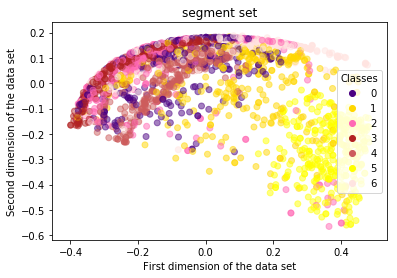

(2, 19) (2310, 2)
[[  5.43527418e-02   6.99605789e-03   4.63306633e-02 ...,   2.24007721e-05
    4.90934978e-07  -1.24631794e-06]
 [  8.67250189e-02   1.66636284e-01   2.27159036e-02 ...,   6.89430373e-06
   -8.22860445e-09  -2.02190977e-06]
 [ -8.88668024e-02  -4.27508394e-01   6.12924861e-02 ...,   4.05769732e-05
    1.31565908e-06   2.12681992e-06]
 ..., 
 [ -8.20402312e-02  -2.09944182e-01  -4.25938417e-03 ...,   3.18419213e-06
    2.74107225e-07   1.92388893e-06]
 [  7.11878479e-02   1.96102391e-01  -8.92214597e-04 ...,  -5.34769055e-06
   -3.08769279e-07  -1.67237718e-06]
 [ -8.04494504e-02   2.84182664e-01  -1.65589192e-01 ...,  -8.78080336e-05
   -2.22623221e-06   1.78165389e-06]]


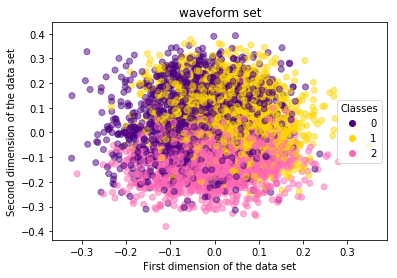

(2, 40) (5000, 2)
[[ 0.00645595  0.00753557 -0.00904816 ...,  0.00479297  0.00405365
  -0.03140035]
 [-0.00044883 -0.00056901  0.00108858 ...,  0.00398575 -0.00344057
  -0.00286816]
 [-0.00562904 -0.00637305  0.00588001 ..., -0.02306256  0.01027635
   0.04946321]
 ..., 
 [ 0.01030266  0.01197181 -0.01389213 ...,  0.01279248  0.00270707
  -0.05612559]
 [-0.01327422 -0.01558561  0.0195363  ..., -0.00109396 -0.01474231
   0.05431677]
 [-0.00645616 -0.00768683  0.01058607 ...,  0.00965803 -0.0146229
   0.01450034]]


In [17]:
from scipy.io import arff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import LabelEncoder
import matplotlib
from config import rootDir
from itertools import islice
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from random import randint


def load_arff_data(dataset_name):
    balanceScale = rootDir + "/" + dataset_name + ".arff"

    data, meta = arff.loadarff(balanceScale)

    normalizer = Normalizer(copy=False)
    class_name = "class"

    for col in list(data.dtype.names):
        if col == "Class":
            class_name = col

    labels = data[class_name]
    labels_strings, labels_true = np.unique(labels, return_inverse=True)

    pca_data = data[[b for b in list(data.dtype.names) if b != class_name]]

    imputer = Imputer(missing_values=0, strategy="mean", axis=0)

    pca_data = pd.DataFrame(pca_data)

    le = LabelEncoder()

    column_type = []

    for col in pca_data.columns.values:
        if pca_data[col].dtypes == "object":
            le.fit(pca_data[col].values)
            pca_data[col] = le.transform(pca_data[col])
            # categorical
            column_type.append(1)
        else:
            column_type.append(0)

    pca_data = np.asarray(pca_data, dtype=np.float32)
    # clustering_data = np.asarray(clustering_data)

    pca_data = imputer.fit_transform(pca_data)
    pca_data = normalizer.fit_transform(pca_data)

    return pca_data, labels_true, labels_strings


def take(n, iterable):
    return list(islice(iterable, n))


def plot_data(data, labels, title):
    n_items = take(len(np.unique(labels)), matplotlib.colors.cnames.iteritems())

    colors = [name for (name, color) in n_items]
    fig = plt.figure()
    ax = plt.subplot(111)

    ax.scatter(data[:, 0], data[:, 1], alpha=0.5, c=labels, cmap=matplotlib.colors.ListedColormap(colors))

    handlelist = [plt.plot([], marker="o", ls="", color=color)[0] for color in colors]

    plt.legend(handlelist, np.unique(labels), loc='right', title="Classes")
    plt.xlabel("First dimension of the data set")
    plt.ylabel("Second dimension of the data set")
    plt.title("{} set".format(title))

    plt.show()


def pca(data, dimensions):
    means = np.mean(data, axis=0)
    means = means.reshape(1, means.shape[0])

    data, data_column_means = np.broadcast_arrays(data, means)
    adjusted_data = np.subtract(data, data_column_means)
    cov_mat = np.cov(adjusted_data.transpose())
    #print('Covariance Matrix:\n', cov_mat)

    eigenvlaues, eigenvectors = np.linalg.eig(cov_mat)

    #for idx, value in enumerate(eigenvlaues):
        #print('Eigenvector {}: \n{}'.format(idx + 1, eigenvectors[idx]))

        #print('Eigenvalue {} from covariance matrix: {}'.format(idx + 1, value))
        #print(40 * '-')

    eigenvlaues = sorted(eigenvlaues, reverse=True)
    eig_pairs = [(eigenvlaues[i], eigenvectors[i]) for i in range(0, len(eigenvlaues))]

    #print("Eigenvalues in decreasing order: \n")
    #for i in eig_pairs:
    #    print(i[0])

    components = eigenvectors[0:dimensions]
    return components, adjusted_data, means


def get_transformed(data,number_of_dimensions=2,dataset_name):
    
    original_data, labels, labels_strings = load_arff_data(dataset_name)
    components, adjusted_data, means = pca(original_data, number_of_dimensions)

    transformed_data = np.dot(adjusted_data, components.transpose())

    adjusted_row_data=np.dot(components.transpose(),transformed_data.transpose())
    adjusted_row_data=adjusted_data.transpose()
    reconstructed_data=np.add(adjusted_row_data,means)
    return transformed_data,reconstructed_data,adjusted_row_data
    

def plot_dataset_2d(dataset_name):
    original_data, labels, labels_strings = load_arff_data(dataset_name)
    components, adjusted_data, means = pca(original_data, 2)

    transformed_data = np.dot(adjusted_data, components.transpose())

    plot_data(transformed_data, labels, dataset_name)

    print components.shape, transformed_data.shape
    adjusted_row_data=np.dot(components.transpose(),transformed_data.transpose())
    adjusted_row_data=adjusted_data.transpose()
    reconstructed_data=np.add(adjusted_row_data,means)
    # reconstructed_data = np.add(adjusted_data, means)
    #
    # fig = plt.figure(figsize=(7, 7))
    # ax = fig.add_subplot(111)
    #
    # ax.plot(transformed_data[:, 0], transformed_data[:, 1], 'o', markersize=8, color='green',
    #         alpha=0.2)
    # ax.plot([transformed_data[:, 0].mean()], [transformed_data[:, 1].mean()], 'o',
    #         markersize=10, color='red', alpha=0.5)
    #
    # plt.xlabel("First dimension of the data set")
    # plt.ylabel("Second dimension of the data set")
    #
    # plt.title('Eigenvectors '+dataset_name)
    #
    # plt.show()

def plot_dataset_3d(dataset_name):
    original_data, labels, labels_strings = load_arff_data(dataset_name)
    components, adjusted_data, means = pca(original_data, 3)

    transformed_data = np.dot(adjusted_data, components.transpose())

    reconstructed_data = np.add(adjusted_data, means)


    class Arrow3D(FancyArrowPatch):
        def __init__(self, xs, ys, zs, *args, **kwargs):
            FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
            self._verts3d = xs, ys, zs

        def draw(self, renderer):
            xs3d, ys3d, zs3d = self._verts3d
            xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
            self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
            FancyArrowPatch.draw(self, renderer)

    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection='3d')

    ax.plot(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], 'o', markersize=8, color='green',
            alpha=0.2)
    ax.plot([transformed_data[:, 0].mean()], [transformed_data[:, 1].mean()], [transformed_data[:, 2].mean()], 'o',
            markersize=10, color='red', alpha=0.5)
    for v in components:
        a = Arrow3D([transformed_data[:, 0].mean(), v[0]], [transformed_data[:, 0].mean(), v[1]],
                    [transformed_data[:, 0].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
        ax.add_artist(a)
    ax.set_xlabel('x_values')
    ax.set_ylabel('y_values')
    ax.set_zlabel('z_values')

    plt.title('Eigenvectors '+dataset_name)

    plt.show()


good_datasets = ['bal', 'vehicle', 'segment', 'waveform']

for dataset in good_datasets:
    plot_dataset_2d(dataset)
